# AUSTIN MONTE - ANALYSIS REPORT
### HYPOTHESIS - Tracking popularity, energy, and tempo, I plan to use those values to determine which of Bruno Mars' studio albums is the favorite by the public. As a critically acclaimed artist with multiple awards, all of his albums are highly praised and being able to use these statistics from Spotify's API will help solve my hypothesis.

#### Majority of Bruno Mars' music is upbeat, pop music that does well on the Billboard top 100, so that is why I believe that tracking popularity, energy, and tempo will be the best data to use for my hypothesis.

#### Bruno Mars has been making music since the early 2010s, before Spotify's existence. Because of this, for his earlier albums, the popularity data might not be as accurate as his later albums, since his earlier albums were mostly sold on CDs instead of streaming.

In [3]:
import urllib
import requests
import json
import pandas as pd
import base64
import matplotlib.pyplot as plt

In [4]:
def get_session_token(SessionID, SessionKey):
    url = 'https://accounts.spotify.com/api/token'
    data = {'grant_type':'client_credentials'}
    encoded_key = base64.b64encode(str(SessionID + ":" + SessionKey).\
                                    encode("ascii"))
    header = {'Authorization': 'Basic {}'.format(encoded_key.decode("ascii"))}

    response = requests.post(url,
                            data = data,
                           headers = header)
    print(response.status_code)
    return response.json()['access_token']

In [5]:
keys = pd.read_csv("spotify api.txt")

In [6]:
access_token = get_session_token(keys['Client_ID'].iloc[0],keys['Client_Secret'].iloc[0])

200


In [7]:
t_features_ep = 'https://api.spotify.com/v1/audio-features'
tracks_ep = 'https://api.spotify.com/v1/tracks'
ab_tracks_ep = 'https://api.spotify.com/v1/albums/{}/tracks'

In [8]:
def api_call(endpoint_url, api_header):
    response = requests.get(endpoint_url, headers = api_header)
    print(response.status_code)
    return response.json()

In [9]:
session_header = {'Authorization': 'Bearer {}'.format(access_token)}

In [10]:
dw_album_id = "1uyf3l2d4XYwiEqAb7t7fX"
#Doo-Woops & Hooligans
uj_album_id = "58ufpQsJ1DS5kq4hhzQDiI"
#Unorthodox Jukebox
tf_album_id = "4PgleR09JVnm3zY1fW3XBA"
#24K Magic
ss_album_id = "4VZ7jhV0wHpoNPCB7Vmiml"
#An Evening with Silk Sonic

In [11]:
ab_tracks_ep.format(dw_album_id)
ab_tracks_ep.format(uj_album_id)
ab_tracks_ep.format(tf_album_id)
ab_tracks_ep.format(ss_album_id)

'https://api.spotify.com/v1/albums/4VZ7jhV0wHpoNPCB7Vmiml/tracks'

In [12]:
dw_album_response = api_call(ab_tracks_ep.format(dw_album_id), session_header)
uj_album_response = api_call(ab_tracks_ep.format(uj_album_id), session_header)
tf_album_response = api_call(ab_tracks_ep.format(tf_album_id), session_header)
ss_album_response = api_call(ab_tracks_ep.format(ss_album_id), session_header)

200
200
200
200


In [13]:
dw_album_df = pd.DataFrame(dw_album_response['items'])
uj_album_df = pd.DataFrame(uj_album_response['items'])
tf_album_df = pd.DataFrame(tf_album_response['items'])
ss_album_df = pd.DataFrame(ss_album_response['items'])

In [14]:
dw_track_ids = ','.join(dw_album_df['id'].to_list())
uj_track_ids = ','.join(uj_album_df['id'].to_list())
tf_track_ids = ','.join(tf_album_df['id'].to_list())
ss_track_ids = ','.join(ss_album_df['id'].to_list())

In [15]:
t_features_ep + '?ids={}'.format(dw_track_ids)
t_features_ep + '?ids={}'.format(uj_track_ids)
t_features_ep + '?ids={}'.format(tf_track_ids)
t_features_ep + '?ids={}'.format(ss_track_ids)

'https://api.spotify.com/v1/audio-features?ids=4K09vJ27xCOreumtSuU6Ao,4pryE6cN2gFL1FVF5fYINl,7suB6D6uKX5DfPukdGaz0W,6jGAh1bFnXt1Muj9zeHveZ,1oERlssLrpssCAY6Yqqs6c,5lka5RUbLVQGO94mKAPMRO,2K6vUau7bnZUamjbRSOOvJ,3WTWh2WDk4j8GUCGj4xfOd,2ALh2jqA7KldpHMUHvRomw,2NqyjfDXy0XfXCSPXMsKzi'

In [16]:
dw_track_features = api_call(t_features_ep + '?ids={}'.format(dw_track_ids), session_header)
uj_track_features = api_call(t_features_ep + '?ids={}'.format(uj_track_ids), session_header)
tf_track_features = api_call(t_features_ep + '?ids={}'.format(tf_track_ids), session_header)
ss_track_features = api_call(t_features_ep + '?ids={}'.format(ss_track_ids), session_header)

403
403
403
403


In [17]:
dw_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(dw_track_ids), session_header)
uj_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(uj_track_ids), session_header)
tf_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(tf_track_ids), session_header)
ss_track_info = api_call(tracks_ep + '?market=US&ids={}'.format(ss_track_ids), session_header)

200
200
200
200


In [18]:
dw_features_df = pd.DataFrame(dw_track_features['audio_features'])
dw_features_df.head()

KeyError: 'audio_features'

In [ ]:
uj_features_df = pd.DataFrame(uj_track_features['audio_features'])
uj_features_df.head()

In [ ]:
tf_features_df = pd.DataFrame(tf_track_features['audio_features'])
tf_features_df.head()

In [ ]:
ss_features_df = pd.DataFrame(ss_track_features['audio_features'])
ss_features_df.head()

In [ ]:
dw_tracks_df = pd.DataFrame(dw_track_info['tracks'])
uj_tracks_df = pd.DataFrame(uj_track_info['tracks'])
tf_tracks_df = pd.DataFrame(tf_track_info['tracks'])
ss_tracks_df = pd.DataFrame(ss_track_info['tracks'])

In [ ]:
dw_merged = pd.merge(dw_features_df, dw_tracks_df,
                     how = 'inner', on = 'id')
dw_merged.head()

In [ ]:
uj_merged = pd.merge(uj_features_df, uj_tracks_df,
                     how = 'inner', on = 'id')
uj_merged.head()

In [ ]:
tf_merged = pd.merge(tf_features_df, tf_tracks_df,
                     how = 'inner', on = 'id')
tf_merged.head()

In [ ]:
ss_merged = pd.merge(ss_features_df, ss_tracks_df,
                     how = 'inner', on = 'id')
ss_merged.head()

In [ ]:
album_comp = pd.concat([dw_merged, uj_merged, tf_merged, ss_merged], axis = 0)
album_comp

In [ ]:
name_pop_eng_temp = album_comp[['name', 'energy', 'popularity', 'tempo']]

In [ ]:
name_pop_eng_temp.head(50)

In [ ]:
fig1, ax1 = plt.subplots(1, 2, figsize = (7, 5))
ax1[0].hist(dw_merged['popularity'])
ax1[1].hist(dw_merged['energy'])
ax1[2].hist(dw_merged['tempo'])

plt.show()

In [ ]:
fig2, ax2 = plt.subplots(1, 2, figsize = (7, 5))
ax2[0].hist(uj_merged['popularity'])
ax2[1].hist(uj_merged['energy'])
ax2[2].hist(uj_merged['tempo'])

plt.show()

In [ ]:
fig3, ax3 = plt.subplots(1, 2, figsize = (7, 5))
ax3[0].hist(tf_merged['popularity'])
ax3[1].hist(tf_merged['energy'])
ax3[2].hist(tf_merged['tempo'])

plt.show()

NameError: name 'ss_merged' is not defined

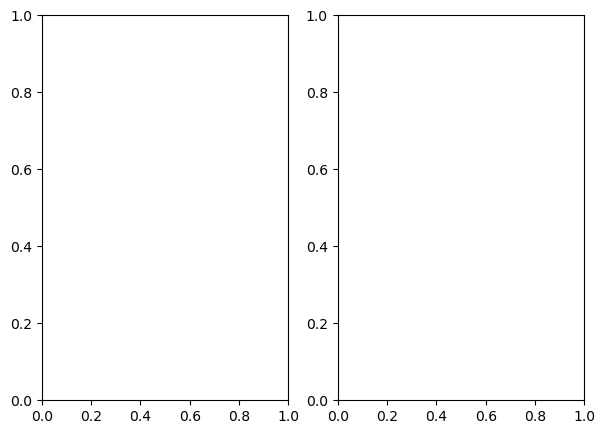

In [19]:
fig4, ax4 = plt.subplots(1, 2, figsize = (7, 5))
ax4[0].hist(ss_merged['popularity'])
ax4[1].hist(ss_merged['energy'])
ax4[2].hist(ss_merged['tempo'])

plt.show()

# Averages per album (DW, UJ, TF, SS)

## Popularity: 69.9, 68.6, 72, 60.7
## Energy: 0.676, 0.628, 0.690, 0.612
## Tempo: 123.070, 116.269, 136.310, 116.022

### Based on the data provided for the four albums, the average popularity ranges from 60.7 to 72, with 24K Magic being the most popular and An Evening with Silk Sonic the least. The energy levels across the albums are relatively consistent, ranging from 0.612 to 0.690, with 24K Magic having the highest energy and An Evening with Silk Sonic the lowest.

### Tempo varies more significantly, with 24K Magic having the fastest average tempo at 136.310 BPM and An Evening with Silk Sonic the slowest at 116.022 BPM. Overall, 24K Magic stands out for its higher popularity, energy, and tempo compared to the other albums.

### The analysis of the data provides a snapshot of key musical attributes (popularity, energy, and tempo) for the four albums, but it has several limitations. The data is averaged, which masks individual song variation and ignores other factors like lyrical content, genre diversity, or production style, all of which can impact listener reception and popularity. Additionally, the metrics used (energy, tempo) are somewhat abstract and may not fully capture the nuances of the albums.

### Alternative approaches could involve analyzing individual song data for a more granular view, incorporating listener demographics, or using  metrics outside of Spotify's API. Next steps could include examining how these metrics correlate with external factors such as release timing, marketing efforts, or artist collaboration, to better understand what drives an album's overall success and popularity.